# Testing the ARF/RMF calculations on Chandra Data

Let's test our ARF/RMF calculations on Chandra data.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ImportError:
    print("Seaborn not installed. Oh well.")
    
import numpy as np

import astropy.io.fits as fits
import sherpa.astro.ui as ui

from clarsach.respond import RMF, ARF

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


Let's load one of the Chandra test data sets from sherpa:

In [2]:
datadir = "../data/Chandra/"

In [3]:
data_file = "js_spec_HI1_IC10X1_5asB1_jsgrp.pi"
rmf_file = "js_spec_HI1_IC10X1_5asB1.rmf"
arf_file = "js_spec_HI1_IC10X1_5asB1.corr.arf"

Let's first load the data using clarsach:

In [4]:
hdulist = fits.open(datadir+data_file)

In [5]:
hdulist.info()

Filename: ../data/Chandra/js_spec_HI1_IC10X1_5asB1_jsgrp.pi
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      30   ()      
  1  SPECTRUM    BinTableHDU    325   1024R x 10C   [J, D, J, D, I, I, J, J, D, D]   


In [6]:
s = hdulist["SPECTRUM"]

In [7]:
s.data.columns

ColDefs(
    name = 'CHANNEL'; format = 'J'; unit = 'channel'
    name = 'PI'; format = 'D'; unit = 'chan'
    name = 'COUNTS'; format = 'J'; unit = 'count'
    name = 'COUNT_RATE'; format = 'D'; unit = 'count/s'
    name = 'GROUPING'; format = 'I'
    name = 'QUALITY'; format = 'I'
    name = 'GRP_NUM'; format = 'J'
    name = 'CHANS_PER_GRP'; format = 'J'
    name = 'GRP_DATA'; format = 'D'
    name = 'GRP_STAT_ERR'; format = 'D'
)

In [8]:
channel = s.data.field("CHANNEL")

In [9]:
pi = s.data.field("PI")

In [10]:
counts = s.data.field("COUNTS")
count_rate = s.data.field("COUNT_RATE")
grp_counts = s.data.field("GRP_DATA")

<IPython.core.display.Javascript object>


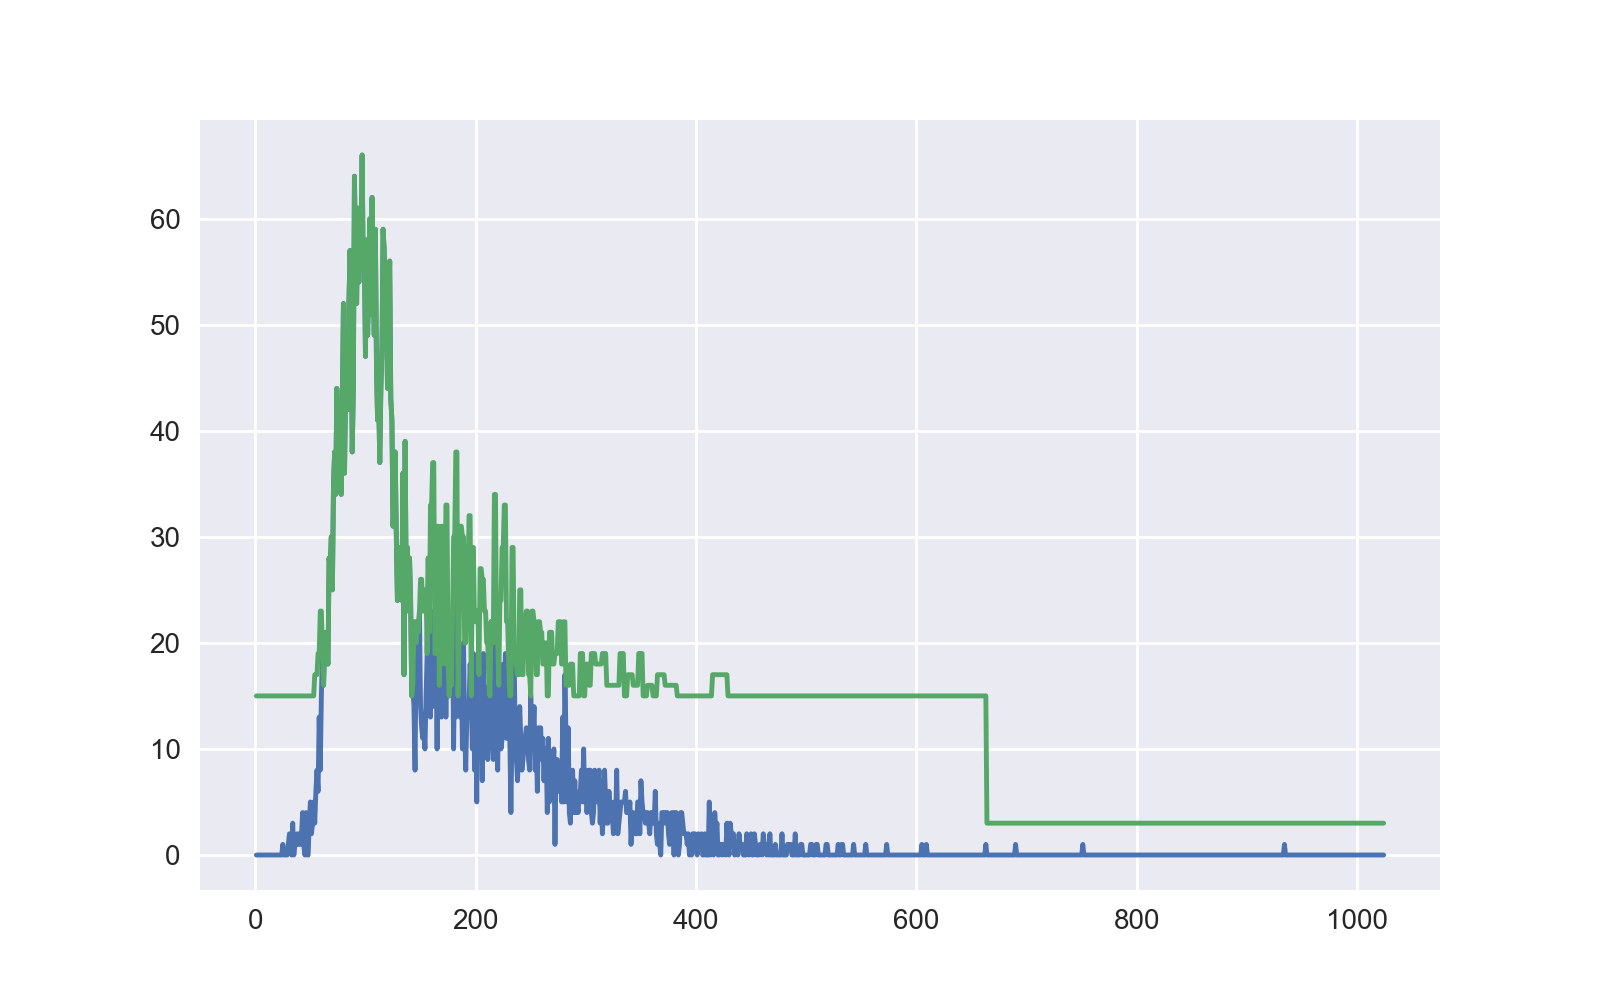

In [11]:
plt.figure(figsize=(8,5))
plt.plot(channel, counts)
plt.plot(channel, grp_counts)

Let's also load the rmf and the arf:

In [12]:
rmf = RMF(datadir+rmf_file)
arf = ARF(datadir+arf_file)

Let's do the same thing with sherpa:

In [13]:
ui.load_data("c1", filename=datadir+data_file)

read ARF file ../data/Chandra/js_spec_HI1_IC10X1_5asB1.corr.arf
detchans: 1024
self._lo.shape: 1070
e_min.shape: 1024
read RMF file ../data/Chandra/js_spec_HI1_IC10X1_5asB1.rmf
read background file ../data/Chandra/js_spec_HI1_IC10X1_5asB1_bkg.pi


In [14]:
ui.ungroup("c1")

In [15]:
ds = ui.get_data("c1")
rmf_s = ds.get_rmf()
arf_s = ds.get_arf()

In [16]:
arf_hdulist = fits.open(datadir+arf_file)

In [17]:
arf_hdulist.info()

Filename: ../data/Chandra/js_spec_HI1_IC10X1_5asB1.corr.arf
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   ()      
  1  SPECRESP    BinTableHDU    245   1070R x 4C   [1E, 1E, 1E, 1D]   


In [18]:
s = arf_hdulist["SPECRESP"]

In [19]:
s.columns

ColDefs(
    name = 'ENERG_LO'; format = '1E'; unit = 'keV'
    name = 'ENERG_HI'; format = '1E'; unit = 'keV'
    name = 'SPECRESP'; format = '1E'; unit = 'cm**2'
    name = 'PSF_FRAC'; format = '1D'
)

In [20]:
s.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                 1070 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
EXTNAME = 'SPECRESP'           / name of this binary table extension            
HDUNAME = 'SPECRESP'           / ASCDM block name                               
CONTENT = 'SPECRESP'                                                            
HDUVERS = '1.1.0   '                                                            
HDUCLASS= 'OGIP    '        

In [21]:
arf_s.energ_hi.shape

(1070,)

In [22]:
rmf_s.e_min

array([  7.30000017e-03,   1.46000003e-02,   2.92000007e-02,
         4.38000001e-02,   5.84000014e-02,   7.29999989e-02,
         8.76000002e-02,   1.02200001e-01,   1.16800003e-01,
         1.31400004e-01,   1.45999998e-01,   1.60600007e-01,
         1.75200000e-01,   1.89799994e-01,   2.04400003e-01,
         2.18999997e-01,   2.33600006e-01,   2.48199999e-01,
         2.62800008e-01,   2.77399987e-01,   2.91999996e-01,
         3.06600004e-01,   3.21200013e-01,   3.35799992e-01,
         3.50400001e-01,   3.65000010e-01,   3.79599988e-01,
         3.94199997e-01,   4.08800006e-01,   4.23400015e-01,
         4.37999994e-01,   4.52600002e-01,   4.67200011e-01,
         4.81799990e-01,   4.96399999e-01,   5.10999978e-01,
         5.25600016e-01,   5.40199995e-01,   5.54799974e-01,
         5.69400012e-01,   5.83999991e-01,   5.98599970e-01,
         6.13200009e-01,   6.27799988e-01,   6.42400026e-01,
         6.57000005e-01,   6.71599984e-01,   6.86200023e-01,
         7.00800002e-01,

In [23]:
ds.channel.shape

(1024,)

We're going to produce the deconvolved spectrum using a flat constant spectrum and apply the ARF/RMF to that:

In [24]:
ui.set_source("c1", ui.polynom1d.truespec)
c_deconv = ui.get_ratio_plot("c1").y
e_deconv = ui.get_ratio_plot("c1").x



size(src): 1070
folded model size: 1024
size(src): 1070
folded model size: 1024


In [25]:
c_deconv.shape

(1024,)

In [26]:
e_deconv

array([  1.09500003e-02,   2.19000005e-02,   3.65000004e-02,
         5.11000007e-02,   6.57000002e-02,   8.02999996e-02,
         9.49000008e-02,   1.09500002e-01,   1.24100003e-01,
         1.38700001e-01,   1.53300002e-01,   1.67900003e-01,
         1.82499997e-01,   1.97099999e-01,   2.11700000e-01,
         2.26300001e-01,   2.40900002e-01,   2.55500004e-01,
         2.70099998e-01,   2.84699991e-01,   2.99300000e-01,
         3.13900009e-01,   3.28500003e-01,   3.43099996e-01,
         3.57700005e-01,   3.72299999e-01,   3.86899993e-01,
         4.01500002e-01,   4.16100010e-01,   4.30700004e-01,
         4.45299998e-01,   4.59900007e-01,   4.74500000e-01,
         4.89099994e-01,   5.03699988e-01,   5.18299997e-01,
         5.32900006e-01,   5.47499985e-01,   5.62099993e-01,
         5.76700002e-01,   5.91299981e-01,   6.05899990e-01,
         6.20499998e-01,   6.35100007e-01,   6.49700016e-01,
         6.64299995e-01,   6.78900003e-01,   6.93500012e-01,
         7.08099991e-01,

In [27]:
e_deconv[:10]

array([ 0.01095,  0.0219 ,  0.0365 ,  0.0511 ,  0.0657 ,  0.0803 ,
        0.0949 ,  0.1095 ,  0.1241 ,  0.1387 ])

In [28]:
arf.e_low[:10]

array([ 0.30000001,  0.31      ,  0.31999999,  0.33000001,  0.34      ,
        0.34999999,  0.36000001,  0.37      ,  0.38      ,  0.38999999], dtype=float32)

In [29]:
e_deconv[:10]

array([ 0.01095,  0.0219 ,  0.0365 ,  0.0511 ,  0.0657 ,  0.0803 ,
        0.0949 ,  0.1095 ,  0.1241 ,  0.1387 ])

In [30]:
counts.shape

(1024,)

In [31]:
bkg_model = np.ones_like(counts)
m_arf = arf.apply_arf(bkg_model)
m_rmf = rmf.apply_rmf(m_arf)

AssertionError: The input spectrum must be of same size as the ARF array.